In [56]:
import numpy as np
import sys
import glob
import pickle
import pandas as pd
import pyccl as ccl
from mpl_toolkits import axes_grid1
import matplotlib.pyplot as plt

# Covariance Matrix Estimation (Pinnochio simulations)

In [77]:
def load(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

In [78]:
dat = load('/sps/lsst/users/cpayerne/1000xsimulations/analysis/binned_catalogs/4x8_binned_catalogs_M_N.pkl')

In [79]:
data = np.array(dat,dtype=object)

In [80]:
count = np.array(data[3])
mass = np.array(data[4])

In [84]:
count.shape

(1000, 4, 8)

In [81]:
n_logm_bin=8
n_z_bin=4

In [88]:
count_ordered = np.zeros([1000, n_logm_bin*n_z_bin])
mass_ordered = np.zeros([1000, n_logm_bin*n_z_bin])
for i in range(1000):
    count_ordered[i,:]=count[i].flatten()
    mass_ordered[i,:]=mass[i].flatten()

In [89]:
count_ordered.shape

(1000, 32)

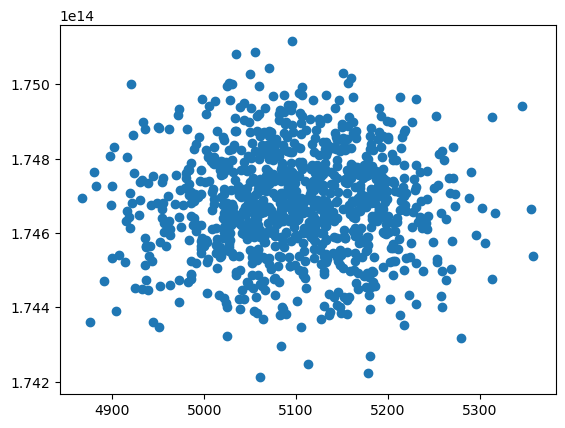

In [97]:
index = 0
plt.scatter(count_ordered[:,index], mass_ordered[:,index])

In [65]:
Covariance_estimation_N = np.cov(count_ordered, bias=True)
Covariance_estimation_M = np.cov(mass_ordered.T, bias=True)

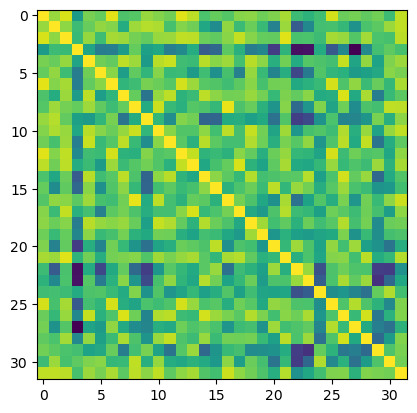

In [69]:
plt.imshow(np.corrcoef(Covariance_estimation_N.T))

In [ ]:
mean_estimation = np.mean(count_ordered.T, axis = 1)

In [ ]:
mean_estimation_plot = mean_estimation.reshape(4*4)

In [ ]:
c = (1000 - n_logm_bin*n_z_bin -2)/(1000-1)

In [ ]:
def corr(C1, C2):
    res=np.zeros([C1.shape[0],C1.shape[1]])
    for i in range(C1.shape[0]):
        for j in range(C1.shape[0]):
            res[i,j]=C1[i,j]/np.sqrt(C2[i,i]*C2[j,j])
    return res

In [25]:
c1=corr(Covariance_estimation-np.diag(mean_estimation.flatten())/c, 
                np.diag(mean_estimation.flatten()))
c2=corr(Covariance_prediction-np.diag(Abundance.flatten()), 
                np.diag(Abundance.flatten()))
plot=np.zeros([c1.shape[0], c1.shape[1]])
for i in range(c1.shape[0]):
    for j in range(c1.shape[1]):
        if i >= j:
            plot[i,j]=Covariance_estimation[i,j]/np.sqrt(Covariance_estimation[i,i]*Covariance_estimation[j,j])
        else: plot[i,j]=Covariance_prediction[i,j]/np.sqrt(Covariance_prediction[i,i]*Covariance_prediction[j,j])

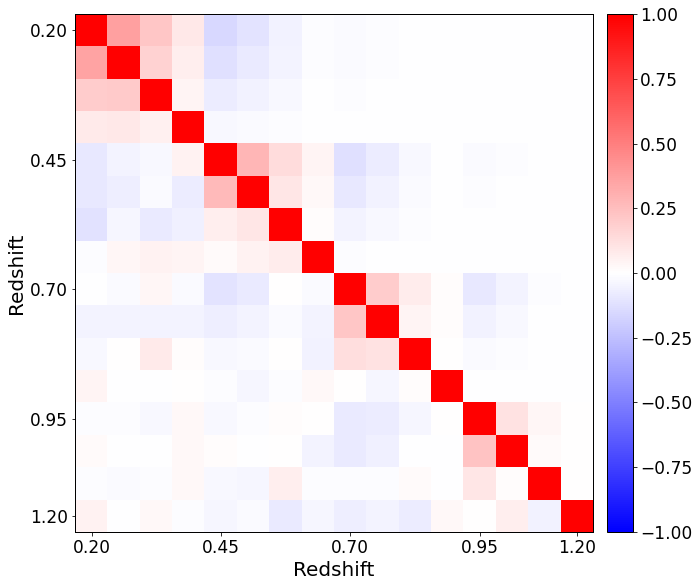

In [98]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.figure(figsize=(10,10))
plt.rcParams['axes.linewidth']= 1
plt.tick_params(axis='both', which = 'major', labelsize= 17)
ax = plt.gca()
im = ax.imshow(plot, cmap='bwr',vmin=-1, vmax=1, )
    
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=.2)

ax.set_xticks(ticks)
ax.set_xticklabels(z_ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(z_ticks)
ax.set_xlabel('Redshift', fontsize = 20)
ax.set_ylabel('Redshift', fontsize = 20)
cb = plt.colorbar(im, cax=cax,)
for t in cb.ax.get_yticklabels():
     t.set_fontsize(17)
plt.savefig('corr.pdf', bbox_inches='tight', dpi=300)